In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import torch
import math
import networkx as nx
from tqdm import tqdm 
from PIL import Image
from crp.image import imgify, vis_opaque_img, plot_grid
from collections import Counter

from tigramite import plotting as tp
import json
%matplotlib inline

In [2]:
from cmiknnmixed import CMIknnMixed
from crp_attribution import CRPAttribution
from network import train_network, performance_analysis, accuracy_per_class
from causal_discovery import CausalDiscovery
from plotting import plot_multipartite, draw_graph
from biased_dsprites_dataset import get_dataset, get_biased_loader
from crp_hierarchies import sample_from_categories, average_hierarchies
%reload_ext autoreload
%autoreload 2

In [29]:
with open("accuracies.json", "r") as f:
    analysis_data = json.load(f)
analysis_data

{'data-0_4-0_5': {'train_accuracy': [99.81552807622137, 99.93465920692613],
  'test_accuracy': [99.79658258746949, 99.90911064083781],
  'all_wm_accuracy': [99.77860378201613, 99.90829614232439],
  'no_wm_accuracy': [99.78191305056764, 99.92892102110031],
  'watermark_concepts': {'convolutional_layers.0': {'0': {'0': {'0': 8.325612187385559,
      '1': -8.374795250594616},
     '1': {'0': -8.46435218397528, '1': 7.944250873755664}},
    '1': {'0': {'0': -1.0300884131453358e-05, '1': 8.05171461620291e-05},
     '1': {'0': 0.0, '1': 0.00795992252554606}},
    '2': {'0': {'0': 33.35370206832886, '1': -35.88318258523941},
     '1': {'0': -17.62018494680524, '1': 21.53375481069088}},
    '3': {'0': {'0': 39.66367506980896, '1': -36.48869833070785},
     '1': {'0': -47.800767712295055, '1': 47.933272421360016}},
    '4': {'0': {'0': 8.86324605345726, '1': -8.59618279337883},
     '1': {'0': -5.240855075768195, '1': 5.7510283186566085}},
    '5': {'0': {'0': 9.793656427413225, '1': -10.610929

In [30]:
data = sorted(analysis_data.values(), key=lambda x: x["bias"])
biases = [a["bias"] for a in  data]


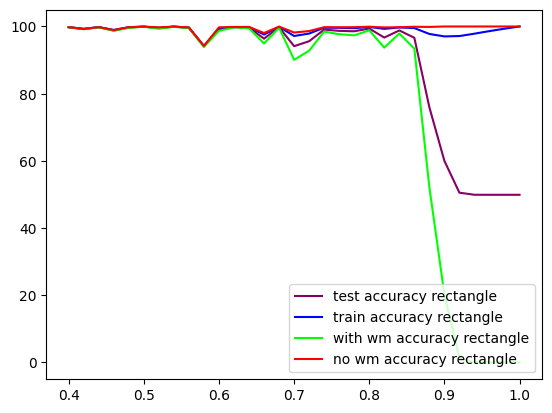

In [33]:

def plot_accs(shape):
    label = "rectangle" if shape == 0 else "ellipse"
    plt.plot(biases, [a["test_accuracy"][shape] for a in  data], c="#806", label=f"test accuracy {label}")
    plt.plot(biases, [a["train_accuracy"][shape] for a in  data], c="#00f", label=f"train accuracy {label}")
    plt.plot(biases, [a["all_wm_accuracy"][shape] for a in  data], c="#0f0", label=f"with wm accuracy {label}")
    plt.plot(biases, [a["no_wm_accuracy"][shape] for a in  data], c="#f00", label=f"no wm accuracy {label}")
    plt.legend(loc="lower right")
plot_accs(0)

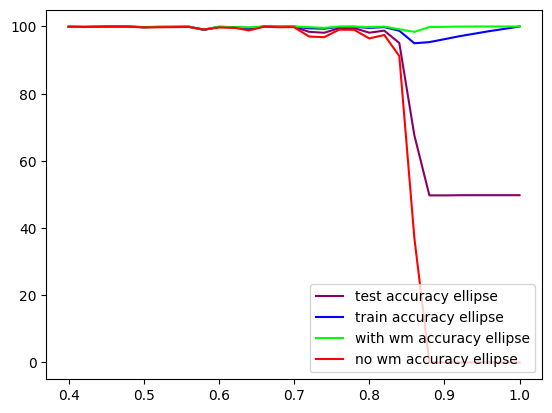

In [32]:
plot_accs(1)

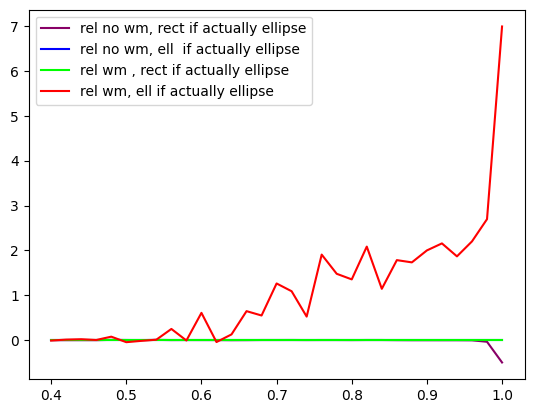

In [38]:
def plot_linear_layer(shape, box="wm"):
    label = "rectangle" if shape == 0 else "ellipse"
    plt.plot(biases, [a["watermark_mask_concepts"][shape]["0"]["linear_layers.2_0"][box] for a in  data], c="#806", label=f"rel no wm, rect if actually {label}")
    plt.plot(biases, [a["watermark_mask_concepts"][shape]["0"]["linear_layers.2_1"][box] for a in  data], c="#00f", label=f"rel no wm, ell  if actually {label}")
    plt.plot(biases, [a["watermark_mask_concepts"][shape]["1"]["linear_layers.2_0"][box] for a in  data], c="#0f0", label=f"rel wm , rect if actually {label}")
    plt.plot(biases, [a["watermark_mask_concepts"][shape]["1"]["linear_layers.2_1"][box] for a in  data], c="#f00", label=f"rel wm, ell if actually {label}")
    plt.legend(loc="upper left")
plot_linear_layer("0", "wm")

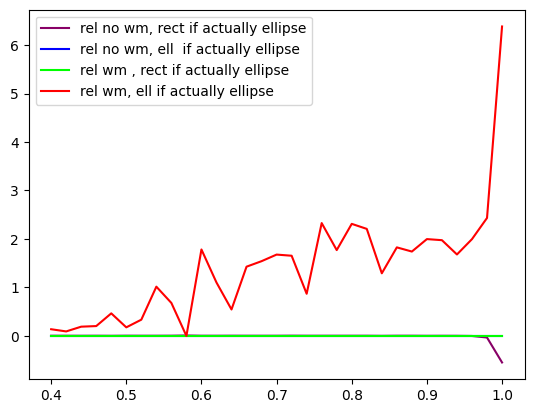

In [41]:
plot_linear_layer("1", "wm")